# **Student Training Program on AIML**
# **Clustering**

# K-Means

K-Means algorithm is a centroid based clustering algorithm where the sum of distances of points from the centroid of each cluster is minimized. The final output is a set of K clusters .ie. the cluster assigned to each point and the K centroids of the clusters.

### The Algorithm
> 1.   Initialize K centroids to K points randomly and set each point's initial cluster as the centroid closest to it.
2.   While the clusers are changing - \\
a. Assign the new centroids as the centroids of the points which have the same assigned cluster. \\
b. Assign the new clusters to the points as the closest centroid.
3. Return the assignments and the centroids.





### Implementation of KMeans and testing on Synthetic Datasets

In [27]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [28]:
# Generating Synthetic Data

k=2
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[ 5.83801528 -9.29715058]
 [ 5.67102739 -9.76225984]
 [ 3.15598083  5.95298368]
 [ 3.87586762  5.94663718]
 [ 3.94478532  4.85652467]]


In [29]:
#DEFINE ALL THE FUNCTIONS & VARIABLES WE NEED TO DO CLUSTERING
#Create an empty dictionary to store the cluster name, centroid and points associated with the cluster.
clusters={}

def initializeClusterCentroids():
  #For each cluster, initialize its properties
  for i in range(k):
      center = np.random.randint(-8, 10, size= (X.shape[1],), )
      points = []

      cluster = {
          'center' : center,
          'points' : points,
          'color' : color[i]
      }
      clusters[i] = cluster #looping over clusters dictionary

#Calculate euclidean distance between v1 and v2
def distance(v1, v2):
    return np.sum((v2-v1)**2)**0.5

def assignPointsToCluster(clusters, X):
    for ix in range(X.shape[0]):#iterate for all datapoints

        #Foe each datapoint, find the distance to k centroids
        distance_of_i = []
        for kx in range(k):
            d = distance(X[ix], clusters[kx]['center']) #we have find distance b/w
            #all the point with all the five (k) cluster centers
            distance_of_i.append(d)

        #Based on the distances to k centroid, pick which cluster to assign it to
        #here we want find the minimum distance of cluster centers
        cluster_to_choose = np.argmin(distance_of_i)
        clusters[cluster_to_choose]['points'].append(X[ix])

#STEP 3: UPDATE CLUSTER CENTROIDS
def updateCluster(clusters):
    for kx in range(k):
        cluster_points = clusters[kx]['points']

        cluster_points = np.array(cluster_points)
        #here pts are array of list but we want array of array so

        if len(cluster_points)>0:
            new_center = np.mean(cluster_points, axis=0) #axis is along rows so will
            #find mean of all the feature seprately it will give 2,0 when we have cluster pts 50,2
            clusters[kx]['center'] = new_center
            clusters[kx]['points'] = [] # clear the points in a cluster list (emptying pts)
            #as we have to do step 2 after step 3 again till not converge

In [30]:
#We need to visualize this too. Lets define a function that can do that!
def plotclusters(clusters, plot):
    for kx in range(k):
        cluster_points = clusters[kx]['points']
        cluster_color = clusters[kx]['color']
        cluster_center = clusters[kx]['center']
        cluster_points = np.array(cluster_points)

        #plotting points associated /nearest to the cluster centers
        if len(cluster_points) > 0:
          plot.scatter(cluster_points[:, 0], cluster_points[:, 1], s = 2, c = cluster_color)

        plot.scatter(cluster_center[0], cluster_center[1], s = 250, c = cluster_color, marker="o")

We can now run and visualize how the clusters evolve.

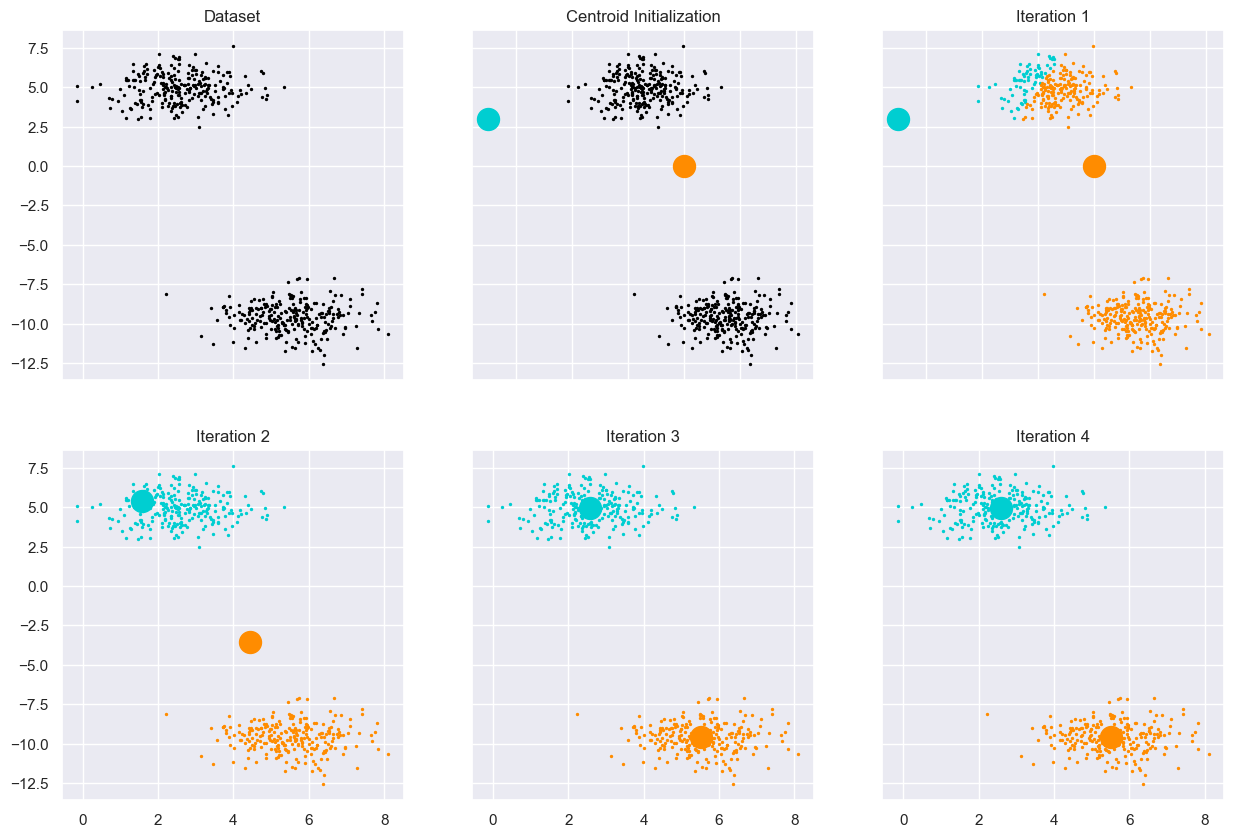

In [31]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

np.random.seed(1)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

Let us now try the same thing with different number of clusters. We will also see how initialization matters.

In [32]:
# Generating Synthetic Data

k=5
color=["darkturquoise","darkorange","teal","darkviolet","tomato", "yellowgreen","hotpink","gold"]

X,_=make_blobs(n_samples=500, n_features=2, centers=k, random_state=10)
print("Shape = " + str(X.shape))

print("Sample:")
print(X[:5])

Shape = (500, 2)
Sample:
[[-7.32786741  4.23641465]
 [ 1.12565931  6.32088416]
 [-0.49239887 -5.28550826]
 [-7.12432134  6.16236021]
 [ 2.38696269  4.11331935]]


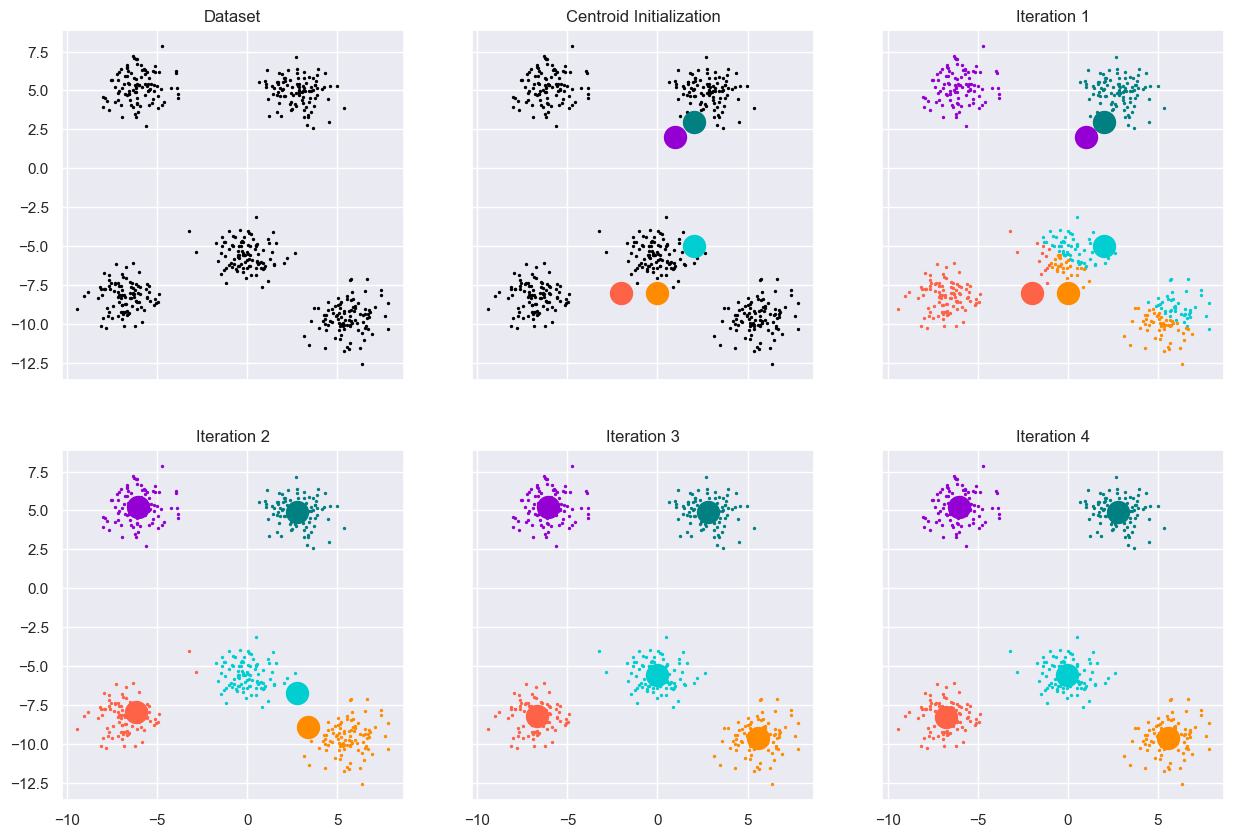

In [33]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(15, 10)
axs[0, 0].scatter(X[:,0],X[:,1], s = 2, c = 'black')
axs[0, 0].set_title('Dataset')

## Change initialization here to 'np.random.seed(0)'
np.random.seed(3)
initializeClusterCentroids()

#Now, lets plot the centroids it has initalized
axs[0, 1].set_title('Centroid Initialization')
axs[0, 1].scatter(X[:, 0], X[:, 1], s = 2, c = 'black')
for i in range(k):#for all the clusters
    center = clusters[i]['center'] #its cluster's center
    axs[0, 1].scatter(center[0], center[1], c=clusters[i]['color'], s=250, marker="o")

#CLUSTERING EPOCH 1
axs[0, 2].set_title('Iteration 1')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[0, 2])
updateCluster(clusters)

#CLUSTERING EPOCH 2
axs[1, 0].set_title('Iteration 2')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 0])
updateCluster(clusters)

#CLUSTERING EPOCH 3
axs[1, 1].set_title('Iteration 3')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 1])
updateCluster(clusters)

#CLUSTERING EPOCH 4
axs[1, 2].set_title('Iteration 4')
assignPointsToCluster(clusters, X)
plotclusters(clusters, axs[1, 2])
updateCluster(clusters)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

**As you can see, changing the random seed and hence changing the initialization has a large effect on the performance of KMeans.**

Hence our KMeans algo can be run by calling the following function with appropriate X (dataset)

In [34]:
from copy import deepcopy

def run_kmeans(k, X):
  initializeClusterCentroids()
  assignPointsToCluster(clusters, X)
  while (True):
    prev_clusters = deepcopy(clusters)
    updateCluster(clusters)
    assignPointsToCluster(clusters, X)
    if prev_clusters == clusters:
      break
  return clusters

### Kmeans in scikit-learn

Even though implementation of KMeans is easy, using libraries like sklearn allows our code to  be much simpler and faster. The next two cells show how to use it.

Check out all functionalities at https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [35]:
from sklearn.cluster import KMeans

kmeans_demo = KMeans(n_clusters=5) #random centroid intialization
#kmeans_demo = KMeans() #What if we dont initialize the number of clusters?
#kmeans_demo = KMeans(n_clusters=5, init='k-means++') #Does smart centroid initialization help?

#Let us fit our synthetic datapoints into the kmeans object
kmeans_demo.fit(X)

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


ITERATIONS TO CONVERGE = 2
CLUSTER CENTROIDS = 
[[-6.06533341  5.2400571 ]
 [-0.06909909 -5.56399319]
 [ 5.56873506 -9.60861515]
 [ 2.78561142  4.93182424]
 [-6.78567723 -8.26282547]]



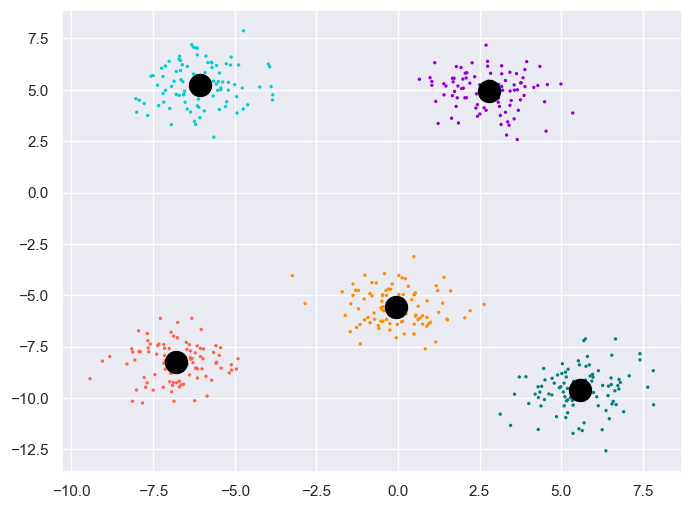

In [36]:
#Lets inspect the clustering model
print("ITERATIONS TO CONVERGE = " + str(kmeans_demo.n_iter_))
print("CLUSTER CENTROIDS = ")
print(str(kmeans_demo.cluster_centers_))
print()

#using the colours we defined for the clusters at the start
colors_toplot = []
for label in kmeans_demo.labels_:
  colors_toplot.append(color[label])

plt.scatter(X[:,0], X[:, 1], c = colors_toplot, s=2)
plt.scatter(kmeans_demo.cluster_centers_[:,0], kmeans_demo.cluster_centers_[:,1], c = 'black', s=250, marker = "o")
plt.gcf().set_size_inches(8,6)
plt.show()

### KMeans on Digits Dataset (KMeans for labelling)

Here we will attempt to use k-means to try to identify similar digits without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

In [37]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [38]:
from sklearn.cluster import KMeans

# Perform KMeans
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

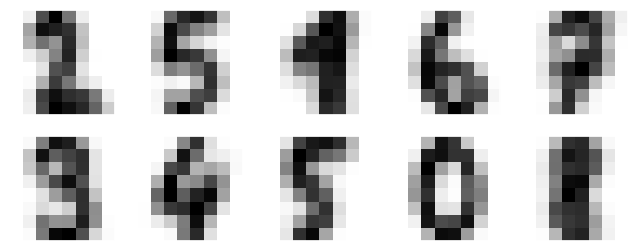

In [39]:
# We can now see how the centers of the clusters formed are

fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

Because k-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [40]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7440178074568725

**Hence clustering algorithms like KMeans are highly effective for identifying labels for groups apriori and even a simple KMeans acheives a ~80% accuracy on digit classification.**

The confusion matrix for this looks like:

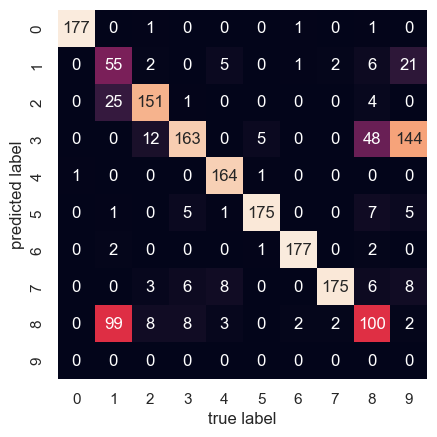

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### KMeans on Iris Dataset (Elbow Method)

We will perform KMeans on the famous Iris Dataset which has four features: sepal length, sepal width, petal length, and petal width. The fifth column is for species, which holds the value for these types of plants.

In [43]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn import datasets

In [44]:
#import the dataset
iris = datasets.load_iris()
# print(iris.data[:10])
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = df.iloc[:, [0,1,2,3]].values
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Let us start with assigning the initial number of clusters as k=5.

In [45]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[3 0 0 0 3 3 0 3 0 0 3 0 0 0 3 3 3 3 3 3 3 3 0 3 0 0 3 3 3 0 0 3 3 3 0 0 3
 3 0 3 3 0 0 3 3 0 3 0 3 0 4 4 4 2 4 2 4 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 4 4
 4 4 4 4 4 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2 2 2 2 2 2 1 4 1 4 1 1 2 1 1 1 4
 4 1 4 4 4 4 1 1 4 1 4 1 4 1 1 4 4 4 1 1 1 4 4 4 1 1 4 4 1 1 4 4 1 1 4 4 4
 4 4]


array([[4.70454545, 3.12272727, 1.41363636, 0.2       ],
       [7.08695652, 3.12608696, 6.01304348, 2.14347826],
       [5.58      , 2.63333333, 3.98666667, 1.23333333],
       [5.24285714, 3.66785714, 1.5       , 0.28214286],
       [6.29361702, 2.9       , 4.95106383, 1.72978723]])

How do we choose the optimal number of clusters? There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.

This graph generally ends up shaped like an elbow, hence its name:

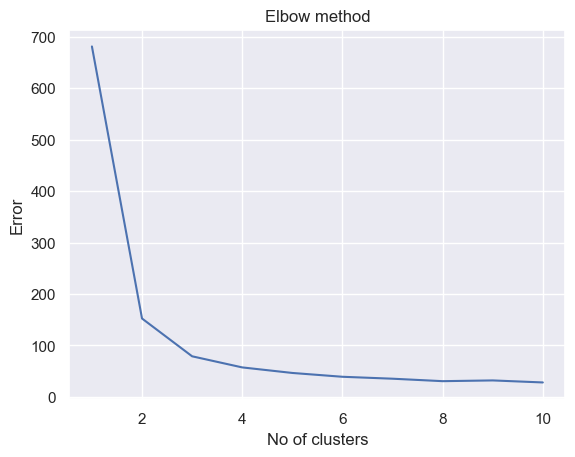

In [46]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

The output graph of the Elbow method shows that the shape of elbow is approximately formed at k=3. The optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [47]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

kmeans3.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623]])

We can now visualize the clustering in two dimensions instead of the original four.

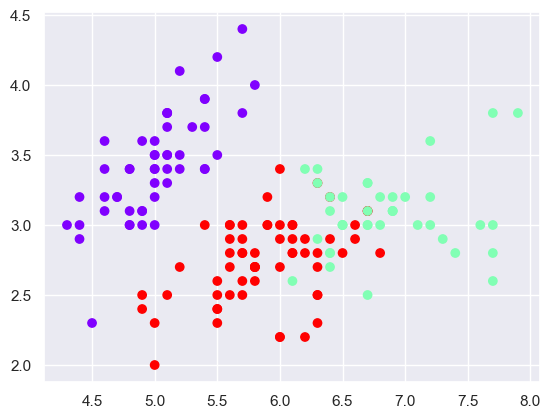

In [48]:
plt.scatter(x[:,0], x[:,1], c=y_kmeans3, cmap='rainbow')

## Points to think about

1. Is feature scaling essential for KMeans as it is for most ML algos? Explain.

Sol: Yes, feature scaling is important for KMeans.
- KMeans uses distances to form clusters.
- If one feature has big values (0–1000) and another small values (0–1), the big one will control the result.
- This makes clusters unfair and biased
- Scaling and standardization puts all features on the same level

2. What are ways to prevent initialization variation in KMeans?

Sol: To prevent initialization variation in KMeans

- We can use k-means++, it chooses better starting points.
- Run many times so that it picks the best clustering among and runs.
- Use prior knowledge - start centroids near known groups if possible.

3. What is the training and testing complexity of KMeans?

Sol:

Training:

- For each iteration, every point is compared with every centroid.
- Complexity ≈ O(n × k × d × t)
  - n = number of points
  - k = clusters
  - d = features
  - t = iterations

Testing:
- Each new point is just compared with all centroids.
- Complexity ≈ O(k × d) per point.

## References and resources

1. https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
2. https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
3. https://en.wikipedia.org/wiki/K-means_clustering
4. https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
5. https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

# Hierarchical Clustering

KMeans is an iterative process. It will keep on running until the centroids of newly formed clusters do not change or the maximum number of iterations are reached.

But there are certain challenges with K-means. It always tries to make clusters of the same size. Also, we have to decide the number of clusters at the beginning of the algorithm. Ideally, we would not know how many clusters should we have, in the beginning of the algorithm and hence it a challenge with K-means.

This is a gap hierarchical clustering bridges with aplomb. It takes away the problem of having to pre-define the number of clusters. Sounds like a dream! So, let’s see what hierarchical clustering is and how it improves on K-means.

## What is Hierarchical Clustering?

Let’s say we have the below points and we want to cluster them into groups:

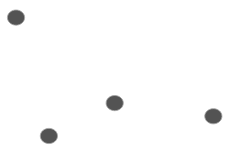

We can assign each of these points to a separate cluster:

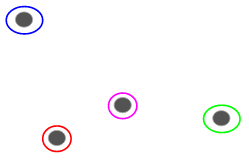

Now, based on the similarity of these clusters, we can combine the most similar clusters together and repeat this process until only a single cluster is left:

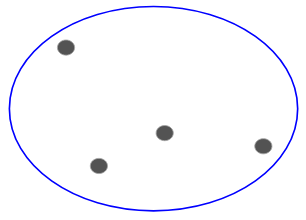

We are essentially building a hierarchy of clusters. That’s why this algorithm is called hierarchical clustering. I will discuss how to decide the number of clusters in a later section. For now, let’s look at the different types of hierarchical clustering.

## Agglomerative Hierarchical Clustering

In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

    Compute the proximity matrix
    Let each data point be a cluster
    Repeat: Merge the two closest clusters and update the proximity matrix
    Until only a single cluster remains

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

    Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.

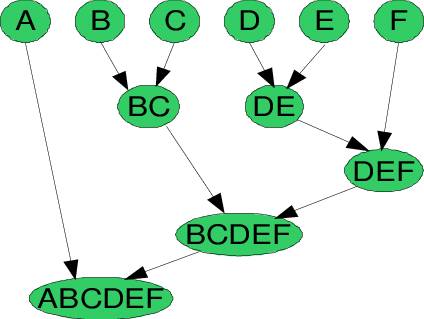

    Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
    Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
    Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
    Step- 5: Finally, all the clusters are merged together and form a single cluster.

Here is what this process in action looks like.

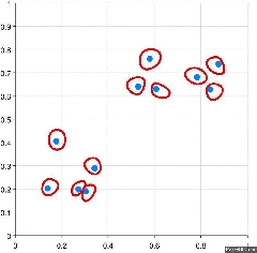

## Dendograms

A Dendrogram is a type of tree diagram showing hierarchical relationships between different sets of data.

As already said a Dendrogram contains the memory of hierarchical clustering algorithm, so just by looking at the Dendrgram you can tell how the cluster is formed.

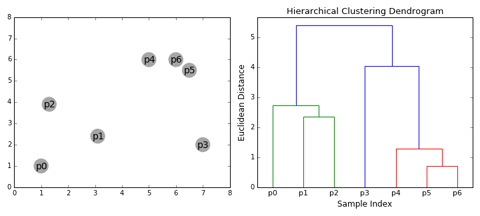



Note:-

    Distance between data points represents dissimilarities.
    Height of the blocks represents the distance between clusters.

So you can observe from the above figure that initially P5 and P6 which are closest to each other by any other point are combined into one cluster followed by P4 getting merged into the same cluster(C2). Then P1and P2 gets combined into one cluster followed by P0 getting merged into the same cluster(C4). Now P3 gets merged in cluster C2 and finally, both clusters get merged into one.

**How do you decide when to stop merging the clusters?**

You cut the dendrogram tree with a horizontal line at a height where the line can traverse the maximum distance up and down without intersecting the merging point.

For example in the below figure L3 can traverse maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

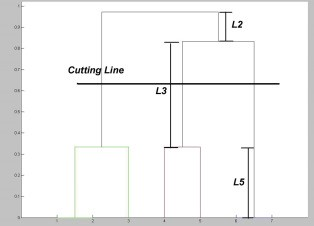

In [49]:
# load necessary files

!curl -L -o 'Mall_Customers.csv' 'https://drive.google.com/uc?export=download&id=1sgy48AZi0It6VBMQXTJbRLjlIg6E7HlY'
!curl -L -o 'Wholesale customers data.csv' 'https://drive.google.com/uc?export=download&id=1Jvqxa_KkjX8nZ5oxXe_6CzQ6aI3vVIZV'

curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
'id' is not recognized as an internal or external command,
operable program or batch file.
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0curl: (6) Could not resolve host: customers
curl: (3) URL rejected: Bad hostname
curl: (3) URL rejected: Port number was not a decimal number between 0 and 65535
'id' is not recognized as an internal or external command,
operable program or batch file.


### Agglomerative Clustering on Mall Visitors Database

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Let's load the dataset

In [51]:
dataset = pd.read_csv('./Mall_Customers.csv')

In [52]:
X = dataset.iloc[:, [3, 4]].values

Next, we need to choose the number of clusters and for doing this we’ll use Dendrograms.

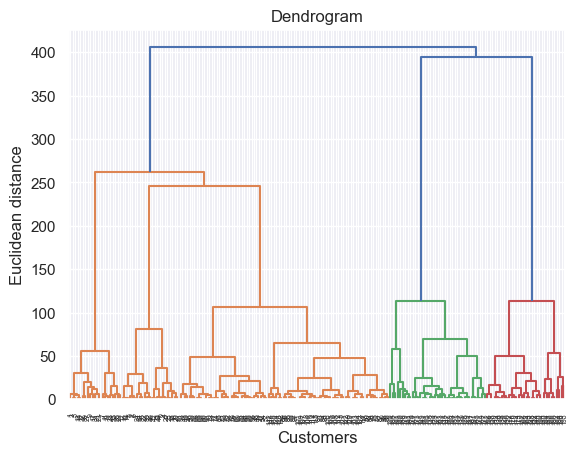

In [53]:
import scipy.cluster.hierarchy as sch
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

As we have already discussed to choose the number of clusters we draw a horizontal line to the longest line that traverses maximum distance up and down without intersecting the merging points. So we draw a horizontal line and the number of verticle lines it intersects is the optimal number of clusters.

In this case, it's 5. So let's fit our Agglomerative model with 5 clusters.

In [54]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualize the results.

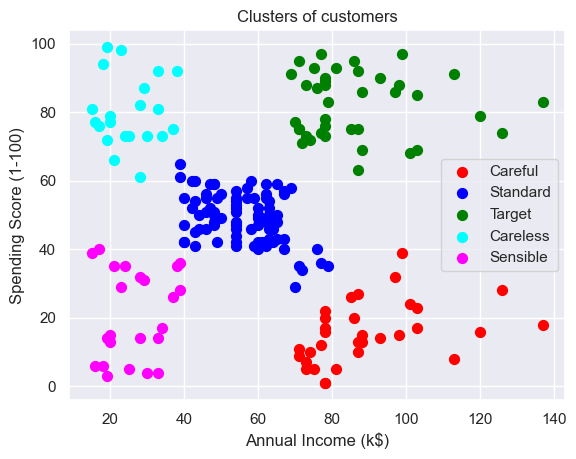

In [55]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Solving the Wholesale Customer Segmentation problem using Hierarchical Clustering

We will be working on a wholesale customer segmentation problem. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
data = pd.read_csv('./Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [58]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


Different types of linkages -

1. 'ward’ minimizes the variance of the clusters being merged.

2. ‘average’ uses the average of the distances of each observation of the two sets.

3. ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.

4. ‘single’ uses the minimum of the distances between all observations of the two sets.

Let us visualize the different types of linkages.



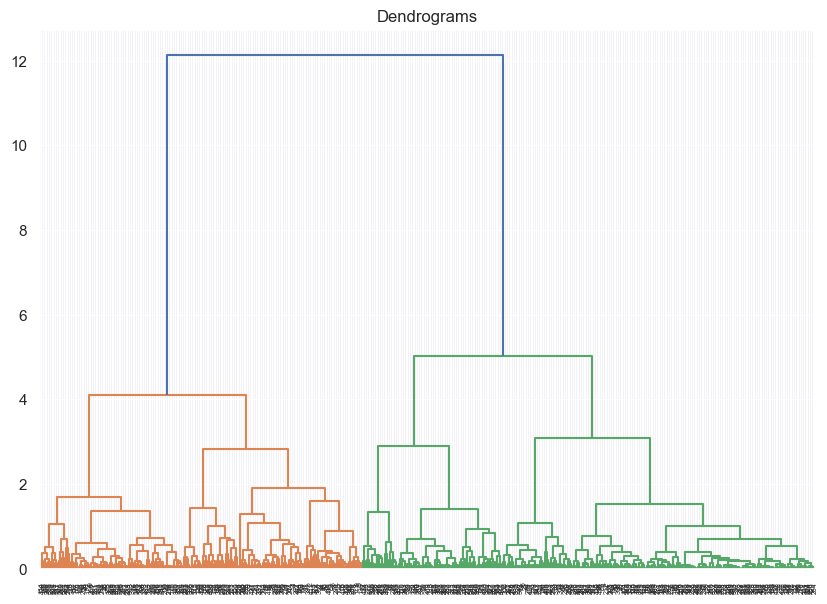

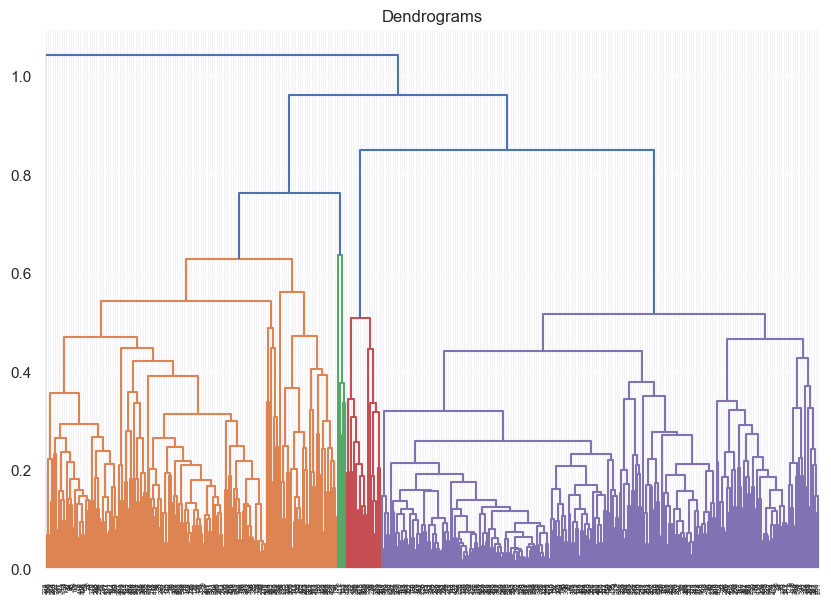

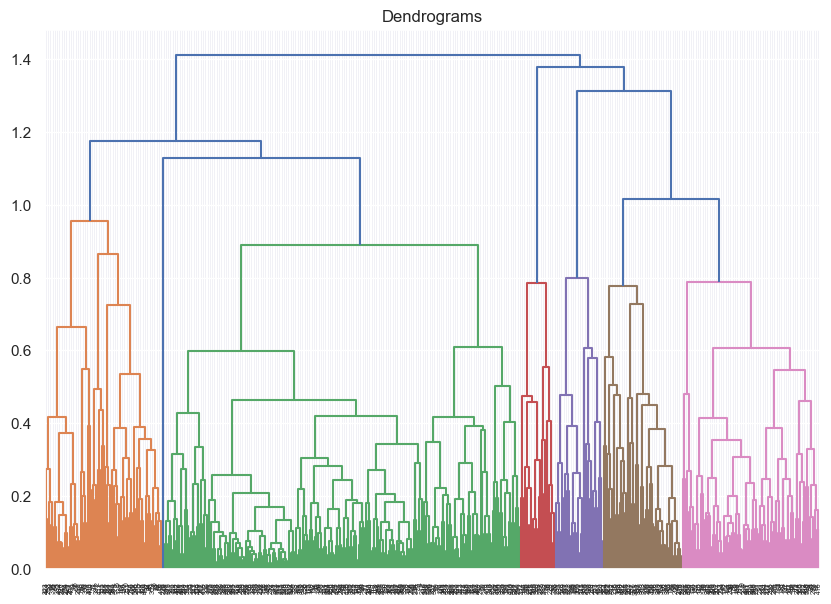

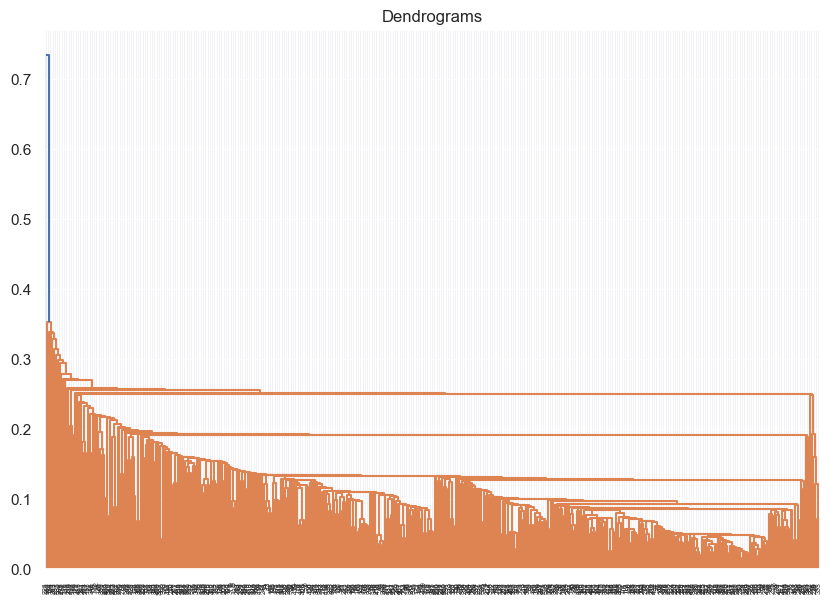

In [59]:
import scipy.cluster.hierarchy as shc
linkages = ['ward', 'average','complete','single']
for linkage in linkages:
  plt.figure(figsize=(10, 7))
  plt.title("Dendrograms")
  dend = shc.dendrogram(shc.linkage(data_scaled, method=linkage))

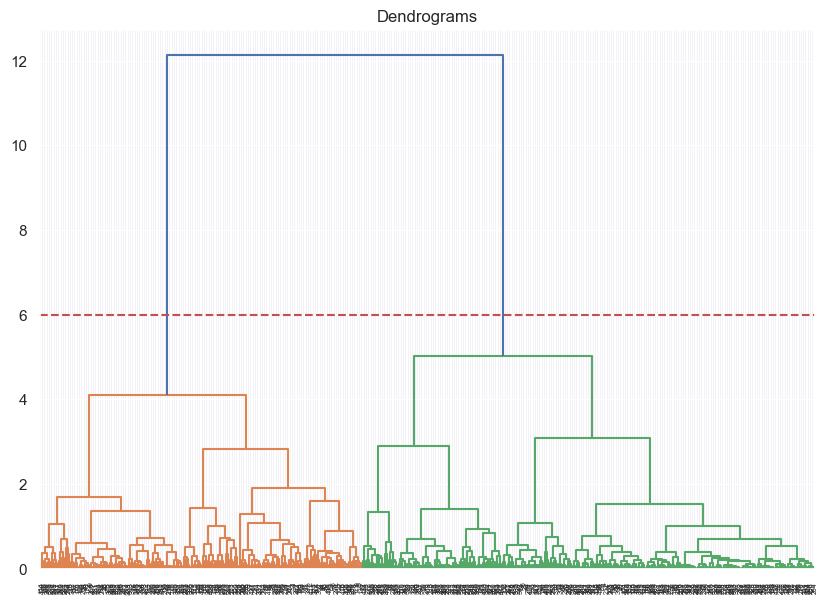

In [60]:
threshold = 6 #@param {type:"slider", min:0, max:100, step:1}

plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=threshold, color='r', linestyle='--')

In [61]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

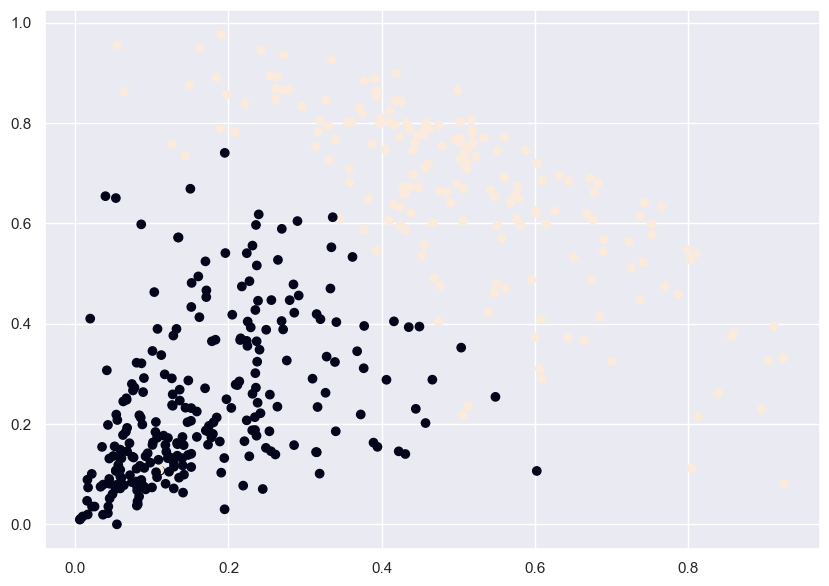

In [62]:
plt.figure(figsize=(10, 7))
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_)

## Divisive Hierarchical Clustering

In Divisive or DIANA(DIvisive ANAlysis Clustering) is a top-down clustering method where we assign all of the observations to a single cluster and then partition the cluster to two least similar clusters. Finally, we proceed recursively on each cluster until there is one cluster for each observation. So this clustering approach is exactly opposite to Agglomerative clustering.

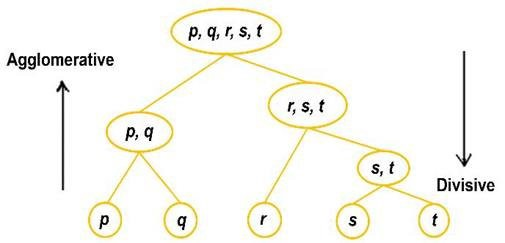

There is evidence that divisive algorithms produce more accurate hierarchies than agglomerative algorithms in some circumstances but is conceptually more complex.

In both agglomerative and divisive hierarchical clustering, users need to specify the desired number of clusters as a termination condition(when to stop merging).

Divisive clustering methods are fairly complicated to implement, so we will not do that here. You can check out open source implementations like https://github.com/div338/Divisive-Clustering-Analysis-Program-DIANA- for further details.

## Exercises

### Exercise 1: Comprehensive Clustering Algorithm Comparison

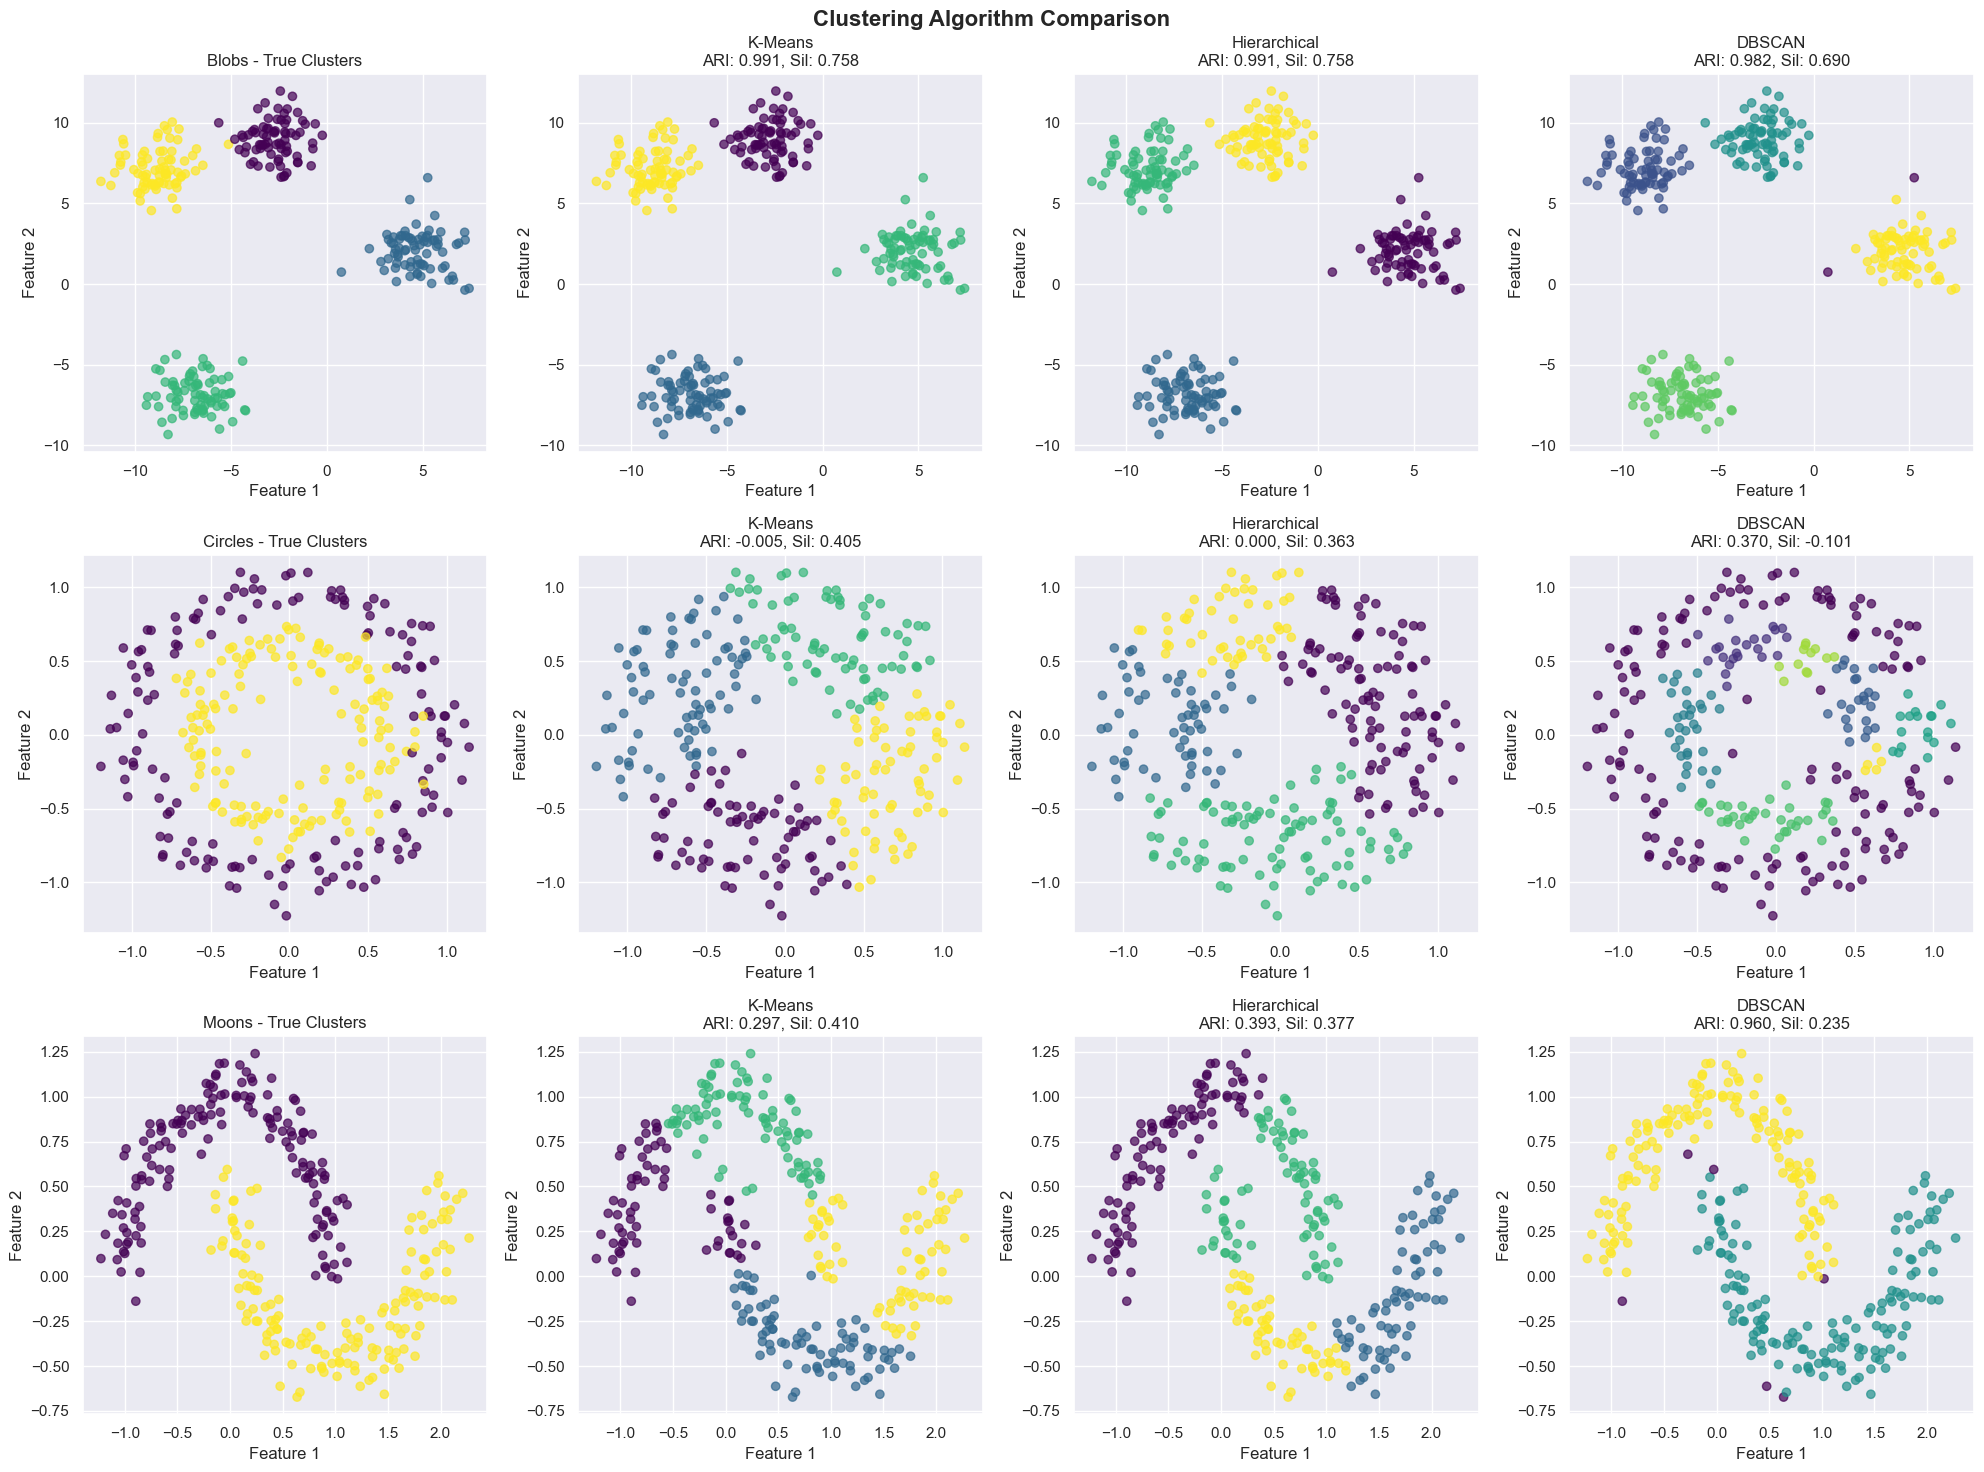


Detailed Results:

Blobs Dataset:
----------------------------------------
K-Means      | ARI: 0.991 | Silhouette: 0.758 | Clusters: 4
Hierarchical | ARI: 0.991 | Silhouette: 0.758 | Clusters: 4
DBSCAN       | ARI: 0.982 | Silhouette: 0.690 | Clusters: 5

Circles Dataset:
----------------------------------------
K-Means      | ARI: -0.005 | Silhouette: 0.405 | Clusters: 4
Hierarchical | ARI: 0.000 | Silhouette: 0.363 | Clusters: 4
DBSCAN       | ARI: 0.370 | Silhouette: -0.101 | Clusters: 8

Moons Dataset:
----------------------------------------
K-Means      | ARI: 0.297 | Silhouette: 0.410 | Clusters: 4
Hierarchical | ARI: 0.393 | Silhouette: 0.377 | Clusters: 4
DBSCAN       | ARI: 0.960 | Silhouette: 0.235 | Clusters: 3

Key Observations:
1. K-Means works best on well-separated, spherical clusters (Blobs)
2. Hierarchical clustering shows consistent performance across datasets
3. DBSCAN excels at non-spherical clusters and can identify noise points
4. Different algorithms are suited

In [63]:
# Exercise 1: Compare K-Means, Hierarchical, and DBSCAN clustering algorithms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Generate different types of datasets
np.random.seed(42)

# Dataset 1: Well-separated blobs (ideal for K-Means)
X_blobs, y_true_blobs = make_blobs(n_samples=300, centers=4, n_features=2, 
                                   random_state=42, cluster_std=1.2)

# Dataset 2: Circles (challenging for K-Means)
X_circles, y_true_circles = make_circles(n_samples=300, noise=0.1, 
                                        factor=0.6, random_state=42)

# Dataset 3: Moons (challenging for K-Means) 
X_moons, y_true_moons = make_moons(n_samples=300, noise=0.1, random_state=42)

datasets = [
    (X_blobs, y_true_blobs, "Blobs"),
    (X_circles, y_true_circles, "Circles"), 
    (X_moons, y_true_moons, "Moons")
]

# Define clustering algorithms
algorithms = {
    'K-Means': KMeans(n_clusters=4, random_state=42, n_init=10),
    'Hierarchical': AgglomerativeClustering(n_clusters=4),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=10)
}

# Compare algorithms on different datasets
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Clustering Algorithm Comparison', fontsize=16, fontweight='bold')

results = {}

for i, (X, y_true, dataset_name) in enumerate(datasets):
    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Plot original data
    axes[i, 0].scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.7)
    axes[i, 0].set_title(f'{dataset_name} - True Clusters')
    axes[i, 0].set_xlabel('Feature 1')
    axes[i, 0].set_ylabel('Feature 2')
    
    results[dataset_name] = {}
    
    for j, (alg_name, algorithm) in enumerate(algorithms.items()):
        # Fit the algorithm
        if alg_name == 'DBSCAN':
            # DBSCAN doesn't need n_clusters parameter
            y_pred = algorithm.fit_predict(X_scaled)
        else:
            y_pred = algorithm.fit_predict(X_scaled)
            
        # Calculate metrics
        ari_score = adjusted_rand_score(y_true, y_pred)
        try:
            sil_score = silhouette_score(X_scaled, y_pred)
        except:
            sil_score = -1  # When clustering fails
            
        results[dataset_name][alg_name] = {
            'ARI': ari_score,
            'Silhouette': sil_score,
            'n_clusters': len(np.unique(y_pred))
        }
        
        # Plot results
        axes[i, j+1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.7)
        axes[i, j+1].set_title(f'{alg_name}\nARI: {ari_score:.3f}, Sil: {sil_score:.3f}')
        axes[i, j+1].set_xlabel('Feature 1')
        axes[i, j+1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Results:")
print("=" * 80)
for dataset_name, dataset_results in results.items():
    print(f"\n{dataset_name} Dataset:")
    print("-" * 40)
    for alg_name, metrics in dataset_results.items():
        print(f"{alg_name:12} | ARI: {metrics['ARI']:.3f} | "
              f"Silhouette: {metrics['Silhouette']:.3f} | "
              f"Clusters: {metrics['n_clusters']}")

print("\nKey Observations:")
print("1. K-Means works best on well-separated, spherical clusters (Blobs)")
print("2. Hierarchical clustering shows consistent performance across datasets")
print("3. DBSCAN excels at non-spherical clusters and can identify noise points")
print("4. Different algorithms are suited for different cluster shapes and densities")

### Exercise 2: Hierarchical Clustering with Different Linkage Methods

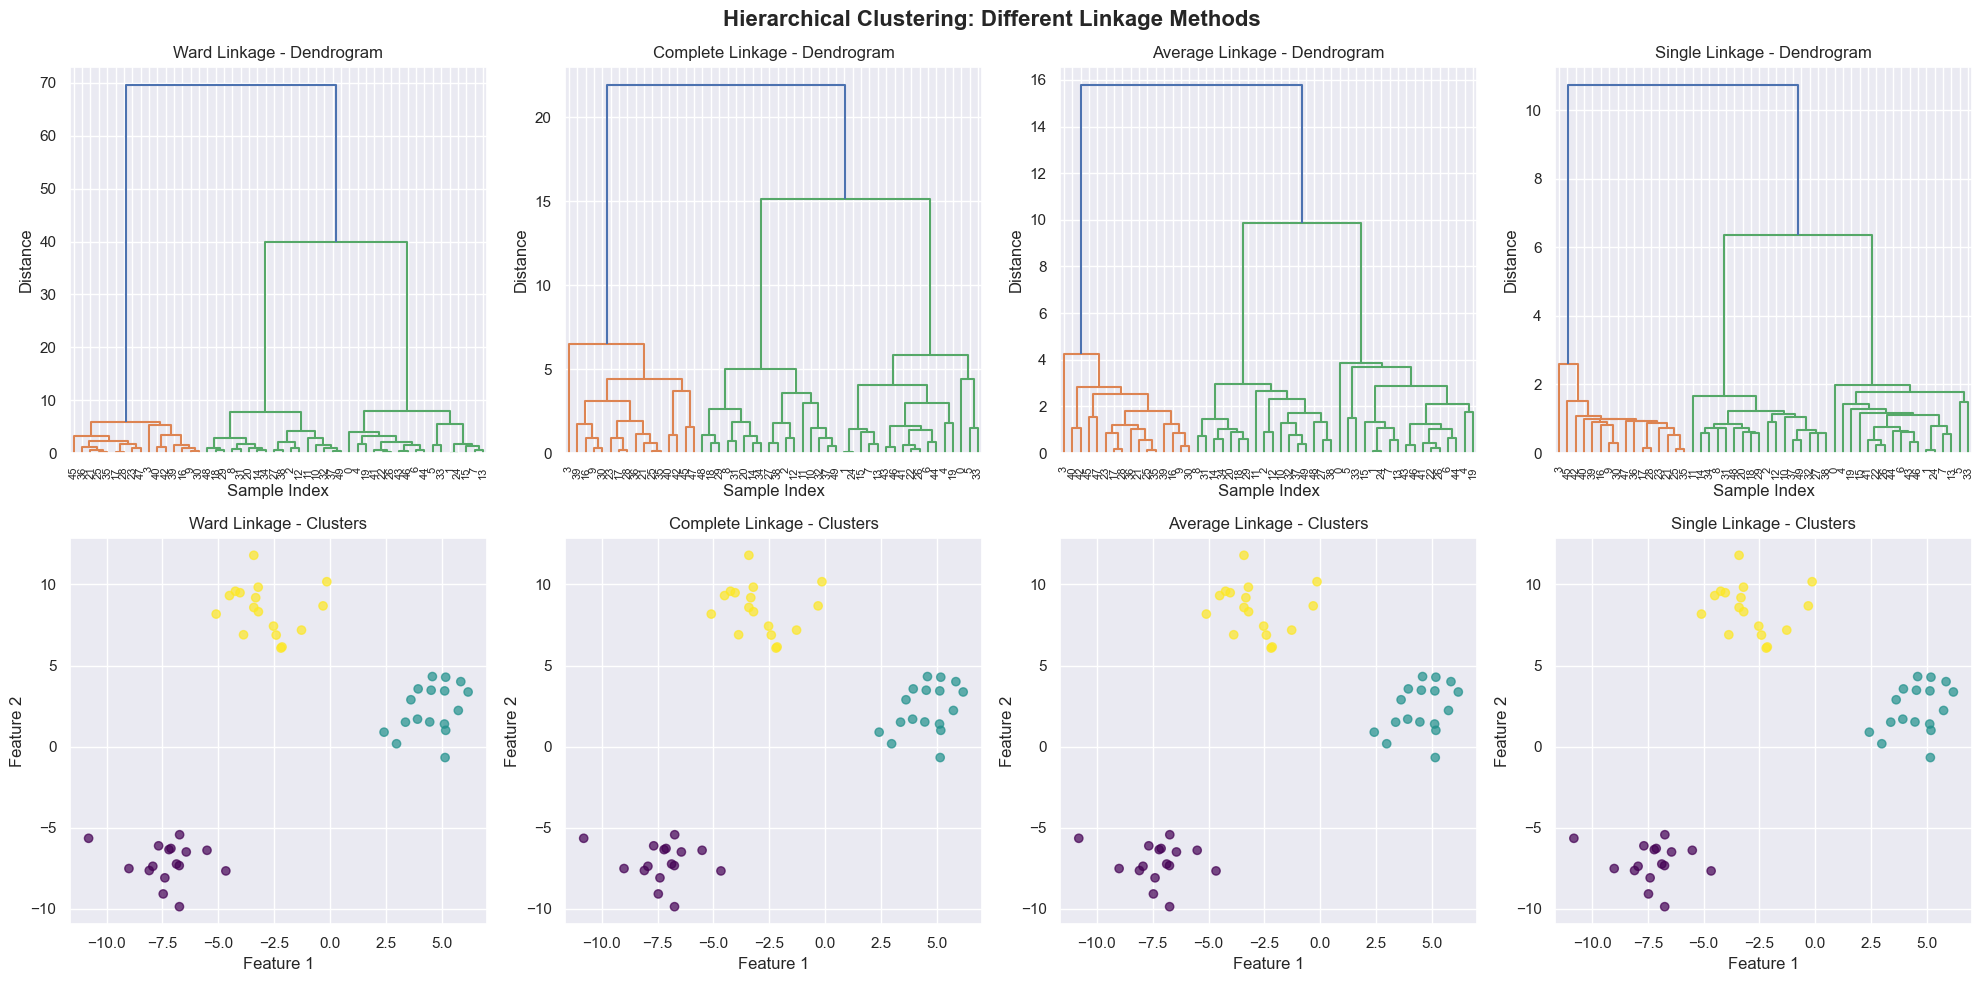

Linkage Method Characteristics:
1. WARD: Minimizes within-cluster variance (works best with spherical clusters)
2. COMPLETE: Uses maximum distance between clusters (creates compact clusters)
3. AVERAGE: Uses average distance between all pairs (balanced approach)
4. SINGLE: Uses minimum distance between clusters (can create elongated clusters)

Ward linkage typically produces the most balanced and interpretable results.


In [64]:
# Exercise 2: Explore different linkage methods in hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

# Generate sample data
np.random.seed(42)
X_sample = make_blobs(n_samples=50, centers=3, n_features=2, 
                      random_state=42, cluster_std=1.5)[0]

# Different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Hierarchical Clustering: Different Linkage Methods', fontsize=16, fontweight='bold')

# Plot dendrograms
for i, method in enumerate(linkage_methods):
    # Compute linkage matrix
    if method == 'ward':
        Z = linkage(X_sample, method=method)
    else:
        Z = linkage(pdist(X_sample), method=method)
    
    # Plot dendrogram
    axes[0, i].set_title(f'{method.capitalize()} Linkage - Dendrogram')
    dendrogram(Z, ax=axes[0, i], leaf_rotation=90, leaf_font_size=8)
    axes[0, i].set_xlabel('Sample Index')
    axes[0, i].set_ylabel('Distance')
    
    # Get cluster labels (3 clusters)
    labels = fcluster(Z, 3, criterion='maxclust')
    
    # Plot clustering results
    axes[1, i].scatter(X_sample[:, 0], X_sample[:, 1], c=labels, cmap='viridis', alpha=0.7)
    axes[1, i].set_title(f'{method.capitalize()} Linkage - Clusters')
    axes[1, i].set_xlabel('Feature 1')
    axes[1, i].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print("Linkage Method Characteristics:")
print("=" * 50)
print("1. WARD: Minimizes within-cluster variance (works best with spherical clusters)")
print("2. COMPLETE: Uses maximum distance between clusters (creates compact clusters)")
print("3. AVERAGE: Uses average distance between all pairs (balanced approach)")
print("4. SINGLE: Uses minimum distance between clusters (can create elongated clusters)")
print("\nWard linkage typically produces the most balanced and interpretable results.")

### Exercise 3: DBSCAN Parameter Optimization

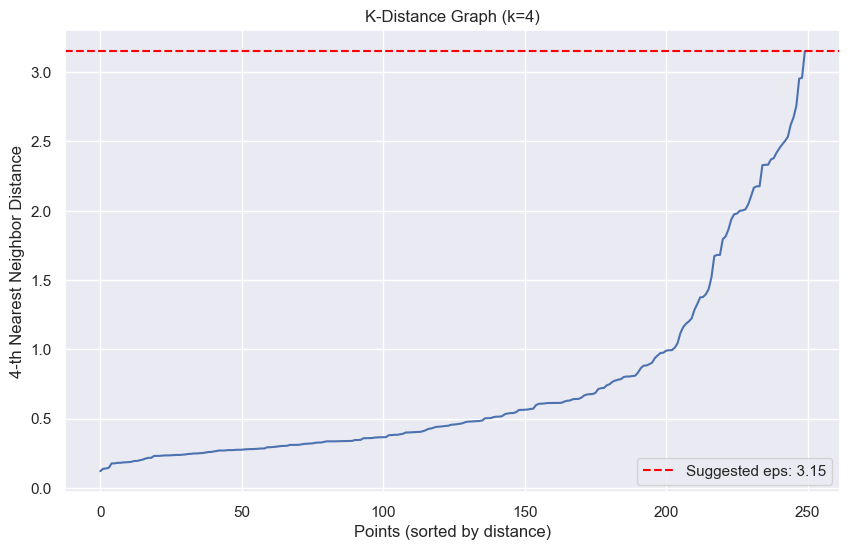

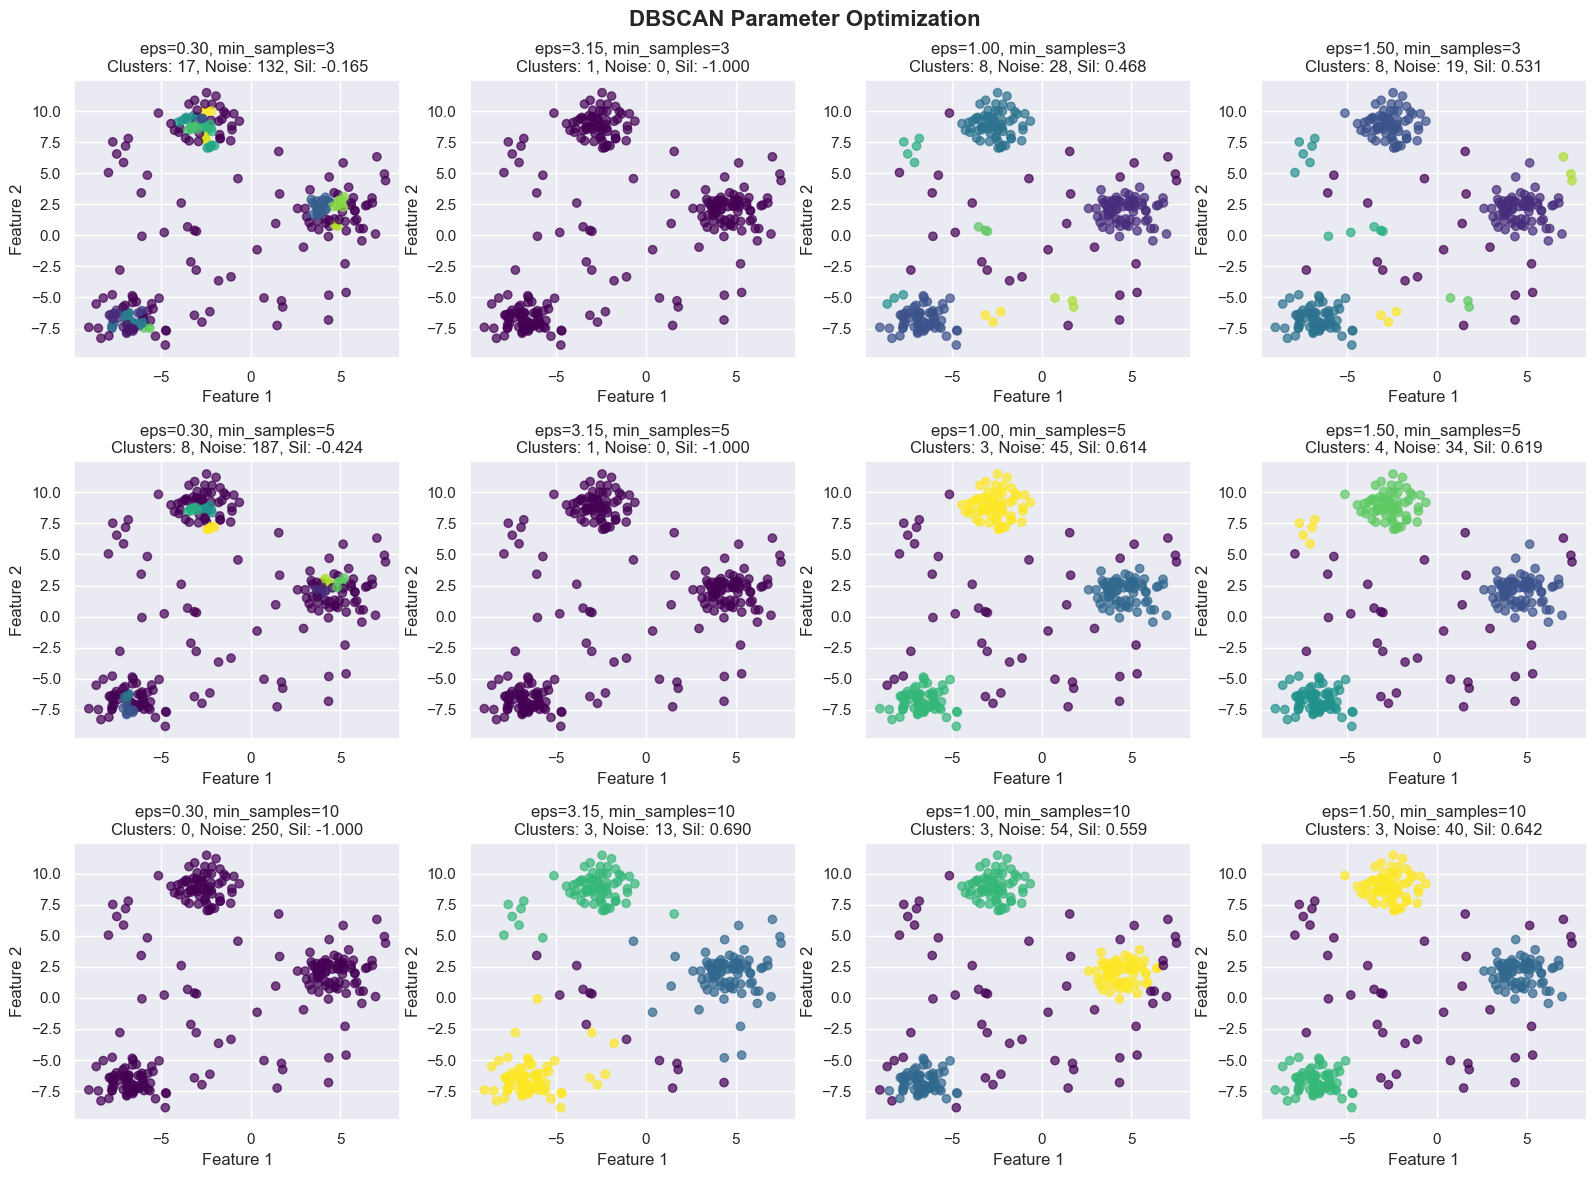

DBSCAN Parameter Optimization Results:

min_samples = 3:
  eps=0.30: Clusters=17, Noise=132, Silhouette=-0.165
  eps=3.15: Clusters= 1, Noise= 0, Silhouette=-1.000
  eps=1.00: Clusters= 8, Noise=28, Silhouette=0.468
  eps=1.50: Clusters= 8, Noise=19, Silhouette=0.531

min_samples = 5:
  eps=0.30: Clusters= 8, Noise=187, Silhouette=-0.424
  eps=3.15: Clusters= 1, Noise= 0, Silhouette=-1.000
  eps=1.00: Clusters= 3, Noise=45, Silhouette=0.614
  eps=1.50: Clusters= 4, Noise=34, Silhouette=0.619

min_samples = 10:
  eps=0.30: Clusters= 0, Noise=250, Silhouette=-1.000
  eps=3.15: Clusters= 3, Noise=13, Silhouette=0.690
  eps=1.00: Clusters= 3, Noise=54, Silhouette=0.559
  eps=1.50: Clusters= 3, Noise=40, Silhouette=0.642

Best Parameters: eps=3.15, min_samples=10
Best Silhouette Score: 0.690


In [65]:
# Exercise 3: Optimize DBSCAN parameters using k-distance graph
from sklearn.neighbors import NearestNeighbors

# Generate complex dataset with noise
np.random.seed(42)
X_complex, _ = make_blobs(n_samples=200, centers=3, n_features=2, 
                          random_state=42, cluster_std=1.0)

# Add noise points
noise_points = np.random.uniform(low=-8, high=8, size=(50, 2))
X_complex = np.vstack([X_complex, noise_points])

# Method 1: K-distance graph to find optimal eps
def plot_k_distance_graph(X, k=4):
    """Plot k-distance graph to help determine optimal eps parameter"""
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)
    
    # Sort distances to k-th nearest neighbor
    distances = np.sort(distances[:, k-1], axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.xlabel('Points (sorted by distance)')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance')
    plt.title(f'K-Distance Graph (k={k})')
    plt.grid(True)
    
    # Find the "elbow" point (knee of the curve)
    # Simple method: point with maximum second derivative
    second_deriv = np.diff(distances, 2)
    knee_idx = np.argmax(second_deriv) + 2
    optimal_eps = distances[knee_idx]
    
    plt.axhline(y=optimal_eps, color='red', linestyle='--', 
                label=f'Suggested eps: {optimal_eps:.2f}')
    plt.legend()
    plt.show()
    
    return optimal_eps

# Find optimal eps
optimal_eps = plot_k_distance_graph(X_complex, k=4)

# Test different parameter combinations
eps_values = [0.3, optimal_eps, 1.0, 1.5]
min_samples_values = [3, 5, 10]

fig, axes = plt.subplots(len(min_samples_values), len(eps_values), 
                        figsize=(16, 12))
fig.suptitle('DBSCAN Parameter Optimization', fontsize=16, fontweight='bold')

results_dbscan = {}

for i, min_samples in enumerate(min_samples_values):
    results_dbscan[min_samples] = {}
    
    for j, eps in enumerate(eps_values):
        # Apply DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_complex)
        
        # Count clusters and noise points
        n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
        n_noise = list(cluster_labels).count(-1)
        
        # Calculate silhouette score (if we have more than 1 cluster)
        if n_clusters > 1:
            silhouette = silhouette_score(X_complex, cluster_labels)
        else:
            silhouette = -1
            
        results_dbscan[min_samples][eps] = {
            'n_clusters': n_clusters,
            'n_noise': n_noise,
            'silhouette': silhouette
        }
        
        # Plot results
        scatter = axes[i, j].scatter(X_complex[:, 0], X_complex[:, 1], 
                                   c=cluster_labels, cmap='viridis', alpha=0.7)
        axes[i, j].set_title(f'eps={eps:.2f}, min_samples={min_samples}\n'
                           f'Clusters: {n_clusters}, Noise: {n_noise}, Sil: {silhouette:.3f}')
        axes[i, j].set_xlabel('Feature 1')
        axes[i, j].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Find best parameters
best_score = -1
best_params = None

print("DBSCAN Parameter Optimization Results:")
print("=" * 60)
for min_samples, eps_results in results_dbscan.items():
    print(f"\nmin_samples = {min_samples}:")
    for eps, metrics in eps_results.items():
        score = metrics['silhouette']
        print(f"  eps={eps:.2f}: Clusters={metrics['n_clusters']:2d}, "
              f"Noise={metrics['n_noise']:2d}, Silhouette={score:.3f}")
        
        if score > best_score and metrics['n_clusters'] > 1:
            best_score = score
            best_params = (eps, min_samples)

if best_params:
    print(f"\nBest Parameters: eps={best_params[0]:.2f}, min_samples={best_params[1]}")
    print(f"Best Silhouette Score: {best_score:.3f}")
else:
    print("\nNo valid clustering found with these parameters.")

### Exercise 4: Real-World Application - Customer Segmentation

Customer Dataset Summary:
Annual Spending ($): Mean=6069.43, Std=1990.56
Frequency Score: Mean=50.74, Std=19.24
Recency (Days): Mean=15.68, Std=26.33


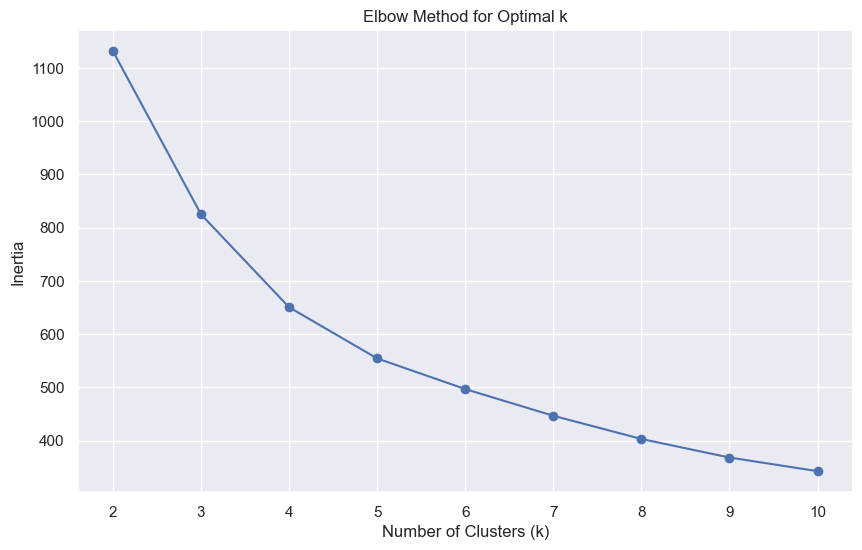

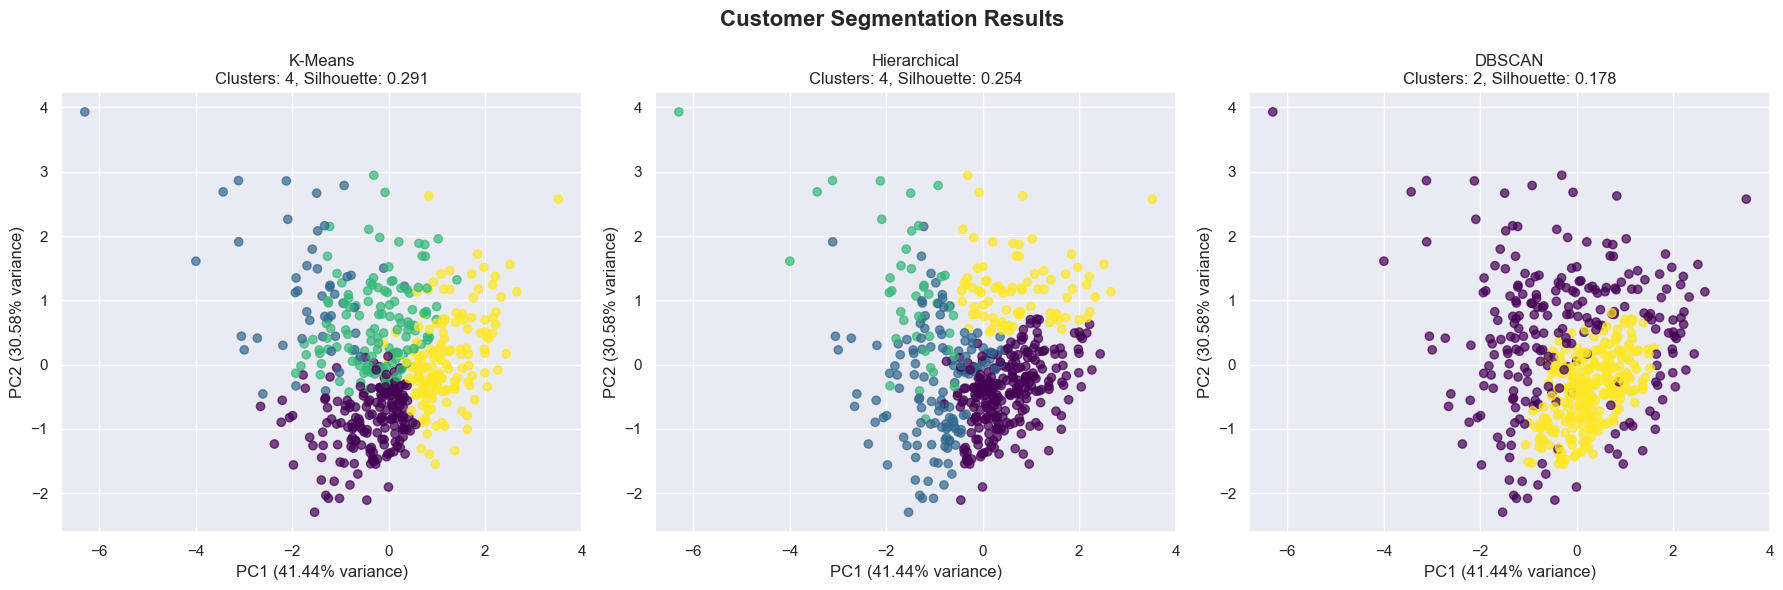


Customer Segment Analysis (K-Means):

Cluster 0 (174 customers):
------------------------------
Annual Spending ($): 4394.13 (Overall: 6069.43)
Frequency Score: 45.96 (Overall: 50.74)
Recency (Days): 5.88 (Overall: 15.68)
Segment Type: Infrequent Customers

Cluster 1 (47 customers):
------------------------------
Annual Spending ($): 4995.40 (Overall: 6069.43)
Frequency Score: 50.64 (Overall: 50.74)
Recency (Days): 81.48 (Overall: 15.68)
Segment Type: At-Risk Customers

Cluster 2 (129 customers):
------------------------------
Annual Spending ($): 7397.28 (Overall: 6069.43)
Frequency Score: 34.20 (Overall: 50.74)
Recency (Days): 16.98 (Overall: 15.68)
Segment Type: Infrequent Customers

Cluster 3 (150 customers):
------------------------------
Annual Spending ($): 7207.35 (Overall: 6069.43)
Frequency Score: 70.54 (Overall: 50.74)
Recency (Days): 5.32 (Overall: 15.68)
Segment Type: High-Value Customers

PCA Explained Variance: 72.02% of total variance
This customer segmentation can hel

In [66]:
# Exercise 4: Apply clustering to a simulated customer dataset
from sklearn.decomposition import PCA

# Create synthetic customer data
np.random.seed(42)
n_customers = 500

# Customer features
annual_spending = np.random.normal(5000, 2000, n_customers)
annual_spending = np.clip(annual_spending, 1000, 15000)

frequency_score = np.random.normal(50, 20, n_customers)
frequency_score = np.clip(frequency_score, 10, 100)

recency_days = np.random.exponential(30, n_customers)
recency_days = np.clip(recency_days, 1, 365)

# Create correlations to make it more realistic
# High spenders tend to have higher frequency and lower recency
annual_spending += frequency_score * 20 + np.random.normal(0, 500, n_customers)
recency_days -= frequency_score * 0.5 + np.random.normal(0, 10, n_customers)
recency_days = np.clip(recency_days, 1, 365)

# Create customer dataset
customer_data = np.column_stack([annual_spending, frequency_score, recency_days])
feature_names = ['Annual Spending ($)', 'Frequency Score', 'Recency (Days)']

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

print("Customer Dataset Summary:")
print("=" * 40)
for i, feature in enumerate(feature_names):
    print(f"{feature}: Mean={customer_data[:, i].mean():.2f}, "
          f"Std={customer_data[:, i].std():.2f}")

# Apply different clustering algorithms
clustering_results = {}

# K-Means with elbow method to find optimal k
inertias = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(customer_data_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Use k=4 based on elbow method
optimal_k = 4

# Apply clustering algorithms
algorithms_customer = {
    'K-Means': KMeans(n_clusters=optimal_k, random_state=42, n_init=10),
    'Hierarchical': AgglomerativeClustering(n_clusters=optimal_k),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=20)
}

# Perform PCA for visualization
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Customer Segmentation Results', fontsize=16, fontweight='bold')

for i, (alg_name, algorithm) in enumerate(algorithms_customer.items()):
    # Fit the algorithm
    cluster_labels = algorithm.fit_predict(customer_data_scaled)
    
    # Calculate metrics
    n_clusters = len(np.unique(cluster_labels))
    if n_clusters > 1:
        silhouette = silhouette_score(customer_data_scaled, cluster_labels)
    else:
        silhouette = -1
    
    clustering_results[alg_name] = {
        'labels': cluster_labels,
        'n_clusters': n_clusters,
        'silhouette': silhouette
    }
    
    # Plot PCA visualization
    scatter = axes[i].scatter(customer_data_pca[:, 0], customer_data_pca[:, 1], 
                             c=cluster_labels, cmap='viridis', alpha=0.7)
    axes[i].set_title(f'{alg_name}\nClusters: {n_clusters}, Silhouette: {silhouette:.3f}')
    axes[i].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    axes[i].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')

plt.tight_layout()
plt.show()

# Analyze customer segments (using K-Means results)
kmeans_labels = clustering_results['K-Means']['labels']

print("\nCustomer Segment Analysis (K-Means):")
print("=" * 50)

for cluster_id in range(optimal_k):
    cluster_mask = kmeans_labels == cluster_id
    cluster_size = np.sum(cluster_mask)
    
    print(f"\nCluster {cluster_id} ({cluster_size} customers):")
    print("-" * 30)
    
    for i, feature in enumerate(feature_names):
        cluster_mean = customer_data[cluster_mask, i].mean()
        overall_mean = customer_data[:, i].mean()
        print(f"{feature}: {cluster_mean:.2f} (Overall: {overall_mean:.2f})")
    
    # Customer segment interpretation
    spending = customer_data[cluster_mask, 0].mean()
    frequency = customer_data[cluster_mask, 1].mean()
    recency = customer_data[cluster_mask, 2].mean()
    
    if spending > customer_data[:, 0].mean() and frequency > customer_data[:, 1].mean():
        segment_type = "High-Value Customers"
    elif spending < customer_data[:, 0].mean() and recency > customer_data[:, 2].mean():
        segment_type = "At-Risk Customers"
    elif frequency < customer_data[:, 1].mean():
        segment_type = "Infrequent Customers"
    else:
        segment_type = "Regular Customers"
        
    print(f"Segment Type: {segment_type}")

print(f"\nPCA Explained Variance: {pca.explained_variance_ratio_.sum():.2%} of total variance")
print("This customer segmentation can help businesses develop targeted marketing strategies.")

## Conclusion

Through these comprehensive exercises, we have demonstrated the practical application and comparison of different clustering algorithms. Here are the key insights:

### Algorithm Strengths and Weaknesses:

**K-Means Clustering:**
- **Strengths**: Fast, simple, works well with spherical clusters of similar sizes
- **Weaknesses**: Requires predefined k, assumes spherical clusters, sensitive to outliers
- **Best for**: Well-separated, roughly spherical clusters with similar densities

**Hierarchical Clustering:**
- **Strengths**: No need to predefine cluster number, provides cluster hierarchy, works with any distance metric
- **Weaknesses**: Computationally expensive O(n³), sensitive to noise and outliers
- **Best for**: Small to medium datasets where cluster hierarchy is important

**DBSCAN:**
- **Strengths**: Finds arbitrary shaped clusters, robust to outliers, automatically determines cluster count
- **Weaknesses**: Sensitive to parameters (eps, min_samples), struggles with varying densities
- **Best for**: Non-spherical clusters, datasets with noise, varying cluster densities

### Practical Recommendations:

1. **Data Exploration**: Always visualize your data first to understand its structure
2. **Algorithm Selection**: Choose based on data characteristics, not algorithmic popularity
3. **Parameter Tuning**: Use systematic approaches (elbow method, silhouette analysis, k-distance graphs)
4. **Validation**: Always validate clustering results with domain knowledge and multiple metrics
5. **Preprocessing**: Standardization is crucial for distance-based algorithms

### Real-World Applications:

Clustering algorithms have wide applications including:
- Customer segmentation for targeted marketing
- Image segmentation in computer vision
- Gene expression analysis in bioinformatics
- Market research and social network analysis
- Anomaly detection in cybersecurity

The choice of clustering algorithm should always be guided by the specific characteristics of your dataset and the business objectives of your analysis.

## Resources and References

### Primary References:
1. **Scikit-learn Documentation**: https://scikit-learn.org/stable/modules/clustering.html
2. **"Introduction to Statistical Learning"** by James, Witten, Hastie, and Tibshirani
3. **"Pattern Recognition and Machine Learning"** by Christopher Bishop

### Online Resources:
4. **Hierarchical Clustering**: https://en.wikipedia.org/wiki/Hierarchical_clustering
5. **Analytics Vidhya Guide**: https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/
6. **Towards Data Science**: https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec
7. **KDnuggets Tutorial**: https://www.kdnuggets.com/2019/09/hierarchical-clustering.html
8. **DBSCAN Explained**: https://towardsdatascience.com/dbscan-clustering-explained-97556a2ad556

### Technical Papers:
9. **Original K-Means Paper**: MacQueen, J. (1967). "Some methods for classification and analysis of multivariate observations"
10. **DBSCAN Paper**: Ester, M., et al. (1996). "A density-based algorithm for discovering clusters in large spatial databases with noise"

### Additional Learning:
11. **Coursera Machine Learning Course** by Andrew Ng
12. **edX MIT Introduction to Machine Learning**
13. **Kaggle Learn Clustering Course**: https://www.kaggle.com/learn/clustering